## Импорт библиотек

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Парсинг данных

Добавляем ?raw=true в конце URL-адреса GitHub, чтобы получить ссылку на необработанный файл.

In [ ]:
url="https://github.com/owid/covid-19-data/blob/master/public/data/owid-covid-data.csv?raw=true"
df = pd.read_csv(url)

Выводим наш ДатаФрейм

In [ ]:
df.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-01-03,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-01-04,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-01-05,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-01-06,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-01-07,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN


In [ ]:
df['date']

0         2020-01-03
1         2020-01-04
2         2020-01-05
3         2020-01-06
4         2020-01-07
             ...    
358744    2023-11-18
358745    2023-11-19
358746    2023-11-20
358747    2023-11-21
358748    2023-11-22
Name: date, Length: 358749, dtype: object

# Предобработка данных и выделение значимых атрибутов

In [ ]:
# Смотрим на пропуски в данных
print("Number of missing values in train dataset:")
print(df.isna().sum())

Number of missing values in train dataset:
iso_code                                        0
continent                                   12881
location                                        0
date                                            0
total_cases                                  9176
                                            ...  
human_development_index                     44950
excess_mortality_cumulative_absolute       215592
excess_mortality_cumulative                215592
excess_mortality                           216499
excess_mortality_cumulative_per_million    215592
Length: 67, dtype: int64


Визуализируем пропуски в наших данных
Возможные цвета визуализации пропусков: Accent', 'Accent_r', 'Blues', 'Blues_r', 'BrBG', 'BrBG_r', 'BuGn', 'BuGn_r', 'BuPu', 'BuPu_r', 'CMRmap', 'CMRmap_r', 'Dark2', 'Dark2_r', 'GnBu', 'GnBu_r', 'Greens', 'Greens_r', 'Greys', 'Greys_r', 'OrRd', 'OrRd_r', 'Oranges', 'Oranges_r', 'PRGn', 'PRGn_r', 'Paired', 'Paired_r', 'Pastel1', 'Pastel1_r', 'Pastel2', 'Pastel2_r', 'PiYG', 'PiYG_r', 'PuBu', 'PuBuGn', 'PuBuGn_r', 'PuBu_r', 'PuOr', 'PuOr_r', 'PuRd', 'PuRd_r', 'Purples', 'Purples_r', 'RdBu', 'RdBu_r', 'RdGy', 'RdGy_r', 'RdPu', 'RdPu_r', 'RdYlBu', 'RdYlBu_r', 'RdYlGn', 'RdYlGn_r', 'Reds', 'Reds_r', 'Set1', 'Set1_r', 'Set2', 'Set2_r', 'Set3', 'Set3_r', 'Spectral', 'Spectral_r', 'Wistia', 'Wistia_r', 'YlGn', 'YlGnBu', 'YlGnBu_r', 'YlGn_r', 'YlOrBr', 'YlOrBr_r', 'YlOrRd', 'YlOrRd_r', 'afmhot', 'afmhot_r', 'autumn', 'autumn_r', 'binary', 'binary_r', 'bone', 'bone_r', 'brg', 'brg_r', 'bwr', 'bwr_r', 'cividis', 'cividis_r', 'cool', 'cool_r', 'coolwarm', 'coolwarm_r', 'copper', 'copper_r', 'crest', 'crest_r', 'cubehelix', 'cubehelix_r', 'flag', 'flag_r', 'flare', 'flare_r', 'gist_earth', 'gist_earth_r', 'gist_gray', 'gist_gray_r', 'gist_heat', 'gist_heat_r', 'gist_ncar', 'gist_ncar_r', 'gist_rainbow', 'gist_rainbow_r', 'gist_stern', 'gist_stern_r', 'gist_yarg', 'gist_yarg_r', 'gnuplot', 'gnuplot2', 'gnuplot2_r', 'gnuplot_r', 'gray', 'gray_r', 'hot', 'hot_r', 'hsv', 'hsv_r', 'icefire', 'icefire_r', 'inferno', 'inferno_r', 'jet', 'jet_r', 'magma', 'magma_r', 'mako', 'mako_r', 'nipy_spectral', 'nipy_spectral_r', 'ocean', 'ocean_r', 'pink', 'pink_r', 'plasma', 'plasma_r', 'prism', 'prism_r', 'rainbow', 'rainbow_r', 'rocket', 'rocket_r', 'seismic', 'seismic_r', 'spring', 'spring_r', 'summer', 'summer_r', 'tab10', 'tab10_r', 'tab20', 'tab20_r', 'tab20b', 'tab20b_r', 'tab20c', 'tab20c_r', 'terrain', 'terrain_r', 'turbo', 'turbo_r', 'twilight', 'twilight_r', 'twilight_shifted', 'twilight_shifted_r', 'viridis', 'viridis_r', 'vlag', 'vlag_r', 'winter', 'winter_r'

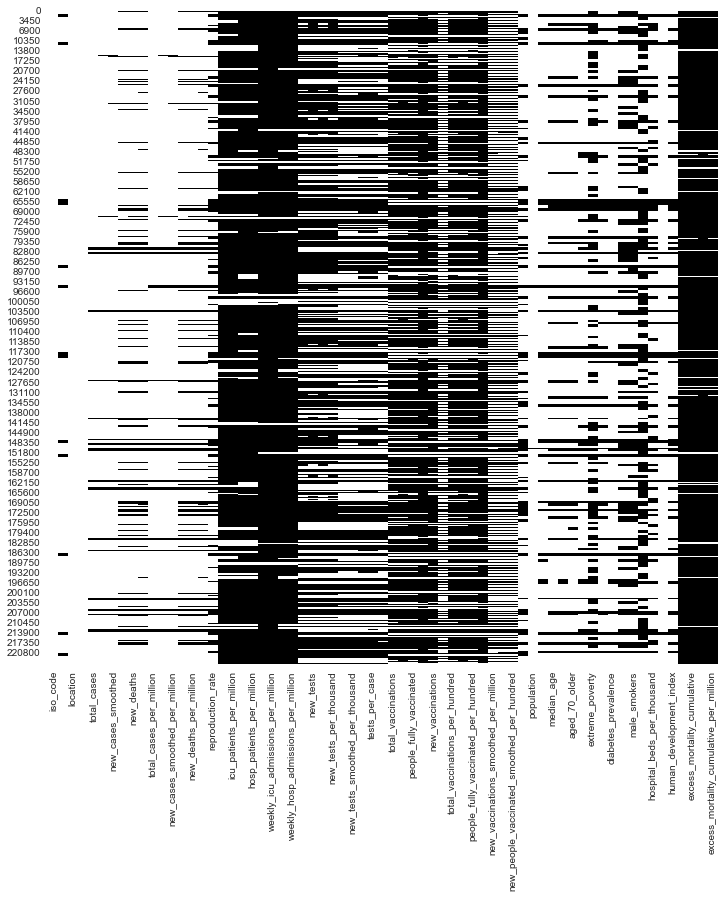

In [ ]:
fig, ax = plt.subplots(figsize=(12, 12))
sns.heatmap(df.isnull(), cbar = False, cmap = 'Greys')
plt.show()

## Заполняем и выкидываем пустые значения по континенту

In [ ]:
continent = df[df['continent'].isnull()]
continent

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
966,OWID_AFR,NaN,Africa,2020-02-13,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
967,OWID_AFR,NaN,Africa,2020-02-14,1.0,1.0,NaN,NaN,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
968,OWID_AFR,NaN,Africa,2020-02-15,1.0,0.0,NaN,NaN,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
969,OWID_AFR,NaN,Africa,2020-02-16,1.0,0.0,NaN,NaN,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
970,OWID_AFR,NaN,Africa,2020-02-17,1.0,0.0,NaN,NaN,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
221440,OWID_WRL,NaN,World,2022-10-12,623110583.0,587185.0,482809.714,6562249.0,1827.0,1373.714,...,6.434,34.635,60.13,2.705,72.58,0.737,NaN,NaN,NaN,NaN
221441,OWID_WRL,NaN,World,2022-10-13,623741751.0,631168.0,475751.286,6564715.0,2466.0,1456.714,...,6.434,34.635,60.13,2.705,72.58,0.737,NaN,NaN,NaN,NaN
221442,OWID_WRL,NaN,World,2022-10-14,624194044.0,452293.0,465860.143,6566258.0,1543.0,1434.143,...,6.434,34.635,60.13,2.705,72.58,0.737,NaN,NaN,NaN,NaN
221443,OWID_WRL,NaN,World,2022-10-15,624407708.0,213664.0,465273.857,6566866.0,608.0,1432.857,...,6.434,34.635,60.13,2.705,72.58,0.737,NaN,NaN,NaN,NaN


Заменяем (исправляем) пустые значение на другое значение.

In [ ]:
# заменим всем у кого пропуски Континента и локация Africa
continent.loc[pd.isna(continent['continent'])&(continent['location'] == 'Africa'), 'continent'] = 'Africa'
# заменим всем у кого пропуски Континента и локация Asia
continent.loc[pd.isna(continent['continent'])&(continent['location'] == 'Asia'), 'continent'] = 'Asia'
# заменим всем у кого пропуски Континента и локация Europe
continent.loc[pd.isna(continent['continent'])&((continent['location'] == 'Europe')|(continent['location'] == 'European Union')), 'continent'] = 'Europe'
# заменим всем у кого пропуски Континента и локация North America
continent.loc[pd.isna(continent['continent'])&(continent['location'] == 'North America'), 'continent'] = 'North America'
# заменим всем у кого пропуски Континента и локация Oceania
continent.loc[pd.isna(continent['continent']) & (continent['location'] == 'Oceania'), 'continent'] = 'Oceania'
# заменим всем у кого пропуски Континента и локация South America
continent.loc[pd.isna(continent['continent']) & (continent['location'] == 'South America'), 'continent'] = 'South America'

Выбрасываем все строки в которых локация равна одному из значений из квадратных скобок

In [ ]:
continent = continent.query("location not in ['High income', 'International', 'Low income', 'Lower middle income', 'Upper middle income', 'World']")

Очистив на тестовом датасете сделаем очистку на оригинальном датасете

In [ ]:
# заменим всем у кого пропуски Континента и локация Africa
df.loc[pd.isna(df['continent'])&(df['location'] == 'Africa'), 'continent'] = 'Africa'
# заменим всем у кого пропуски Континента и локация Asia
df.loc[pd.isna(df['continent'])&(df['location'] == 'Asia'), 'continent'] = 'Asia'
# заменим всем у кого пропуски Континента и локация Europe
df.loc[pd.isna(df['continent'])&((df['location'] == 'Europe')|(df['location'] == 'European Union')), 'continent'] = 'Europe'
# заменим всем у кого пропуски Континента и локация North America
df.loc[pd.isna(df['continent'])&(df['location'] == 'North America'), 'continent'] = 'North America'
# заменим всем у кого пропуски Континента и локация Oceania
df.loc[pd.isna(df['continent']) & (df['location'] == 'Oceania'), 'continent'] = 'Oceania'
# заменим всем у кого пропуски Континента и локация South America
df.loc[pd.isna(df['continent']) & (df['location'] == 'South America'), 'continent'] = 'South America'

In [ ]:
df = df.query("location not in ['High income', 'International', 'Low income', 'Lower middle income', 'Upper middle income', 'World']")

Выводим наш датафрейм с заполнеными данными по континенту

In [ ]:
df

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-02-24,5.0,5.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-02-25,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-02-26,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-02-27,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-02-28,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
224244,ZWE,Africa,Zimbabwe,2022-10-12,257798.0,49.0,32.857,5604.0,0.0,0.143,...,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN
224245,ZWE,Africa,Zimbabwe,2022-10-13,257827.0,29.0,24.571,5605.0,1.0,0.143,...,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN
224246,ZWE,Africa,Zimbabwe,2022-10-14,257827.0,0.0,24.571,5605.0,0.0,0.143,...,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN
224247,ZWE,Africa,Zimbabwe,2022-10-15,257827.0,0.0,24.571,5605.0,0.0,0.143,...,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN


## Обрабатываем остальные пустые значения

Провека, сколько ещё пустных значений в DataFrame.

In [ ]:
df.isna().sum()

iso_code                                        0
continent                                       0
location                                        0
date                                            0
total_cases                                  9174
                                            ...  
human_development_index                     40003
excess_mortality_cumulative_absolute       209646
excess_mortality_cumulative                209646
excess_mortality                           210553
excess_mortality_cumulative_per_million    209646
Length: 67, dtype: int64

In [ ]:
# Копируем датасет в переменную df1, чтобы если что можно было бы исправлять ошибки не с самого начала, а отсюда
df1 = df.copy

Удаление столбцов, в которых пустых значений больше 70% от всего столбца.

In [ ]:
# удаляем все столбцы в которых пропусков данных больше 70%
thresh = len(df)*0.7
df1 = df.loc[:, df.isna().sum().le(thresh)]

In [ ]:
df1

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
0,AFG,Asia,Afghanistan,2020-02-24,5.0,5.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
1,AFG,Asia,Afghanistan,2020-02-25,5.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
2,AFG,Asia,Afghanistan,2020-02-26,5.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
3,AFG,Asia,Afghanistan,2020-02-27,5.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
4,AFG,Asia,Afghanistan,2020-02-28,5.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
224244,ZWE,Africa,Zimbabwe,2022-10-12,257798.0,49.0,32.857,5604.0,0.0,0.143,...,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571
224245,ZWE,Africa,Zimbabwe,2022-10-13,257827.0,29.0,24.571,5605.0,1.0,0.143,...,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571
224246,ZWE,Africa,Zimbabwe,2022-10-14,257827.0,0.0,24.571,5605.0,0.0,0.143,...,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571
224247,ZWE,Africa,Zimbabwe,2022-10-15,257827.0,0.0,24.571,5605.0,0.0,0.143,...,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571


Проверка, сколько ещё осталось пропущенных значений.


In [ ]:
df1.isna().sum()

iso_code                                           0
continent                                          0
location                                           0
date                                               0
total_cases                                     9174
new_cases                                       9474
new_cases_smoothed                             10640
total_deaths                                   28293
new_deaths                                     28414
new_deaths_smoothed                            29564
total_cases_per_million                         9174
new_cases_per_million                           9474
new_cases_smoothed_per_million                 10640
total_deaths_per_million                       28293
new_deaths_per_million                         28414
new_deaths_smoothed_per_million                29564
reproduction_rate                              52569
total_tests                                   138916
new_tests                                     

Визуализируем, сколько ещё осталось пропущенных значений в DataFrame.

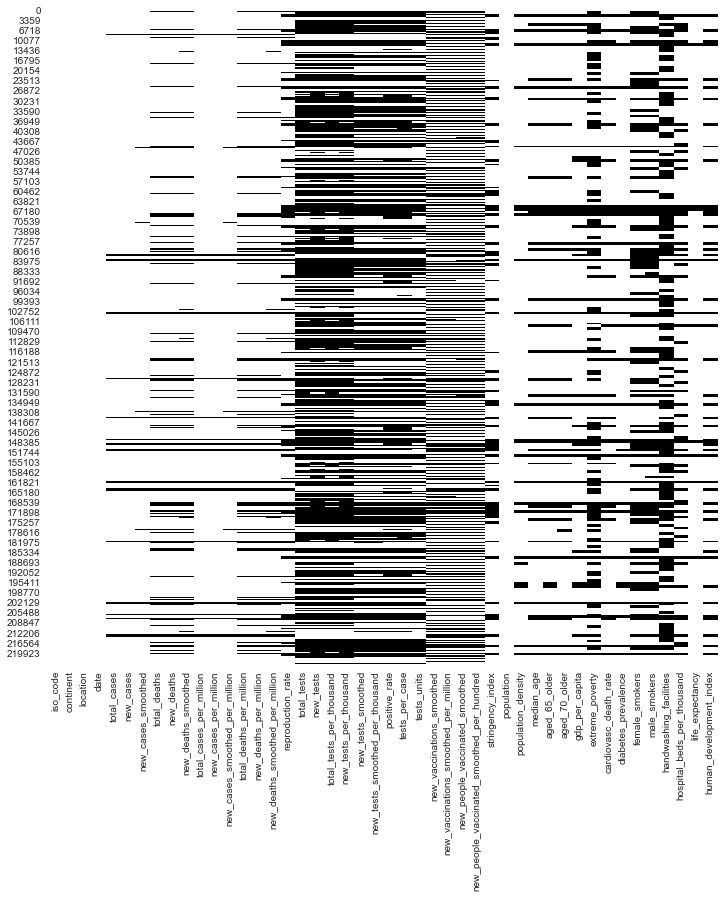

In [ ]:
fig, ax = plt.subplots(figsize=(12, 12))
sns.heatmap(df1.isnull(), cbar = False, cmap = 'Greys')
plt.show()

Выводим список столбцов со значением object.

In [ ]:
df1.columns[df1.dtypes=='object']

Index(['iso_code', 'continent', 'location', 'date', 'tests_units'], dtype='object')

Перекодируем объекты типа object в числа.

In [ ]:
from sklearn import preprocessing
transform = ['iso_code', 'continent', 'location', 'date', 'tests_units']
for col in transform:
    # создание и обучение
    le = preprocessing.LabelEncoder()
    df1[col] = le.fit_transform(df1[col])
    integer_mapping = {l: i for i, l in enumerate(le.classes_)}
    print('значения полученные при переодировке ', col, '-', integer_mapping)

C:\Users\igorv\AppData\Local\Temp\ipykernel_2260\1104183131.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1[col] = le.fit_transform(df1[col])


значения полученные при переодировке  iso_code - {'ABW': 0, 'AFG': 1, 'AGO': 2, 'AIA': 3, 'ALB': 4, 'AND': 5, 'ARE': 6, 'ARG': 7, 'ARM': 8, 'ATG': 9, 'AUS': 10, 'AUT': 11, 'AZE': 12, 'BDI': 13, 'BEL': 14, 'BEN': 15, 'BES': 16, 'BFA': 17, 'BGD': 18, 'BGR': 19, 'BHR': 20, 'BHS': 21, 'BIH': 22, 'BLR': 23, 'BLZ': 24, 'BMU': 25, 'BOL': 26, 'BRA': 27, 'BRB': 28, 'BRN': 29, 'BTN': 30, 'BWA': 31, 'CAF': 32, 'CAN': 33, 'CHE': 34, 'CHL': 35, 'CHN': 36, 'CIV': 37, 'CMR': 38, 'COD': 39, 'COG': 40, 'COK': 41, 'COL': 42, 'COM': 43, 'CPV': 44, 'CRI': 45, 'CUB': 46, 'CUW': 47, 'CYM': 48, 'CYP': 49, 'CZE': 50, 'DEU': 51, 'DJI': 52, 'DMA': 53, 'DNK': 54, 'DOM': 55, 'DZA': 56, 'ECU': 57, 'EGY': 58, 'ERI': 59, 'ESH': 60, 'ESP': 61, 'EST': 62, 'ETH': 63, 'FIN': 64, 'FJI': 65, 'FLK': 66, 'FRA': 67, 'FRO': 68, 'FSM': 69, 'GAB': 70, 'GBR': 71, 'GEO': 72, 'GGY': 73, 'GHA': 74, 'GIB': 75, 'GIN': 76, 'GMB': 77, 'GNB': 78, 'GNQ': 79, 'GRC': 80, 'GRD': 81, 'GRL': 82, 'GTM': 83, 'GUM': 84, 'GUY': 85, 'HKG': 86, 'HN

Выведем перекодированые данные.

In [ ]:
df1.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
0,1,1,0,54,5.0,5.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
1,1,1,0,55,5.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
2,1,1,0,56,5.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
3,1,1,0,57,5.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
4,1,1,0,58,5.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511


По возможности, пытаемся заполнить оставшиеся пустые значения по методу ffill.

In [ ]:
# Из-за слабых вычислительных мощностей, приходиться пользоваться вначале заполнением по прошлым
# заполняем пропуски в данных на основе метода ffill - заполнение пропуска прошлым имеющимся
df1.fillna(method='ffill', inplace=True)

C:\Users\igorv\AppData\Local\Temp\ipykernel_2260\1064562872.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.fillna(method='ffill', inplace=True)


Провека, сколько ещё остлось пустых значений.

In [ ]:
df1.isna().sum()

iso_code                                         0
continent                                        0
location                                         0
date                                             0
total_cases                                      0
new_cases                                        0
new_cases_smoothed                               5
total_deaths                                    28
new_deaths                                      28
new_deaths_smoothed                             33
total_cases_per_million                          0
new_cases_per_million                            0
new_cases_smoothed_per_million                   5
total_deaths_per_million                        28
new_deaths_per_million                          28
new_deaths_smoothed_per_million                 33
reproduction_rate                               34
total_tests                                    705
new_tests                                     1943
total_tests_per_thousand       

Оставшиеся значения заменим с помощью KNNImputer оставшиеся пустые значения будут заменены наиболее вероятными числами, на основании 25 соседей.

In [ ]:
# Обучим наш заполнятель по 25 соседям
from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors=25)

In [ ]:
%%time
df1.iloc[:,:] = imputer.fit_transform(df1)

<timed exec>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


CPU times: total: 1min 22s
Wall time: 2min 4s


Проверяем что наш imputer заполнил данные полностью

In [ ]:
df1.isna().sum()

iso_code                                      0
continent                                     0
location                                      0
date                                          0
total_cases                                   0
new_cases                                     0
new_cases_smoothed                            0
total_deaths                                  0
new_deaths                                    0
new_deaths_smoothed                           0
total_cases_per_million                       0
new_cases_per_million                         0
new_cases_smoothed_per_million                0
total_deaths_per_million                      0
new_deaths_per_million                        0
new_deaths_smoothed_per_million               0
reproduction_rate                             0
total_tests                                   0
new_tests                                     0
total_tests_per_thousand                      0
new_tests_per_thousand                  

Проверка типов данных в DataFrame.

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 218303 entries, 0 to 224248
Data columns (total 46 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   iso_code                                    218303 non-null  float64
 1   continent                                   218303 non-null  float64
 2   location                                    218303 non-null  float64
 3   date                                        218303 non-null  float64
 4   total_cases                                 218303 non-null  float64
 5   new_cases                                   218303 non-null  float64
 6   new_cases_smoothed                          218303 non-null  float64
 7   total_deaths                                218303 non-null  float64
 8   new_deaths                                  218303 non-null  float64
 9   new_deaths_smoothed                         218303 non-null  float64
 

## Работа с выбросами- медиана (Q2/50-й процентиль): среднее значение набора данных.
- первый квартиль (Q1/25-й процентиль): среднее число между
- наименьшим числом (не «минимум») и медианой набора данных.
- третий квартиль (Q3/75-й процентиль): среднее значение между
- медианой и максимальным значением (не «максимальным») набора данных.
- Межквартильный диапазон (IQR) : от 25-го до 75-го процентиля. IQR показывает, насколько разбросаны средние значения.
- «максимум»: Q3 + 1,5*IQR
- «минимум»: Q1 -1,5*IQR
- Выбросы : Все что не входит в промежуток Q1-Q3 будет у нас выбросом

In [ ]:
df1.columns

Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate', 'total_tests',
       'new_tests', 'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'tests_units',
       'new_vaccinations_smoothed', 'new_vaccinations_smoothed_per_million',
       'new_people_vaccinated_smoothed',
       'new_people_vaccinated_smoothed_per_hundred', 'stringency_index',
       'population', 'population_density', 'median_age', 'aged_65_older',
       'aged_70_older', 'gdp_per_capita', 'extreme_poverty',
       'cardiovasc_death_rate', 'diabetes_prevalence', 'female_smokers',
     

In [ ]:
len(df1.columns)

46

### Визуализация выбросов и их анализ

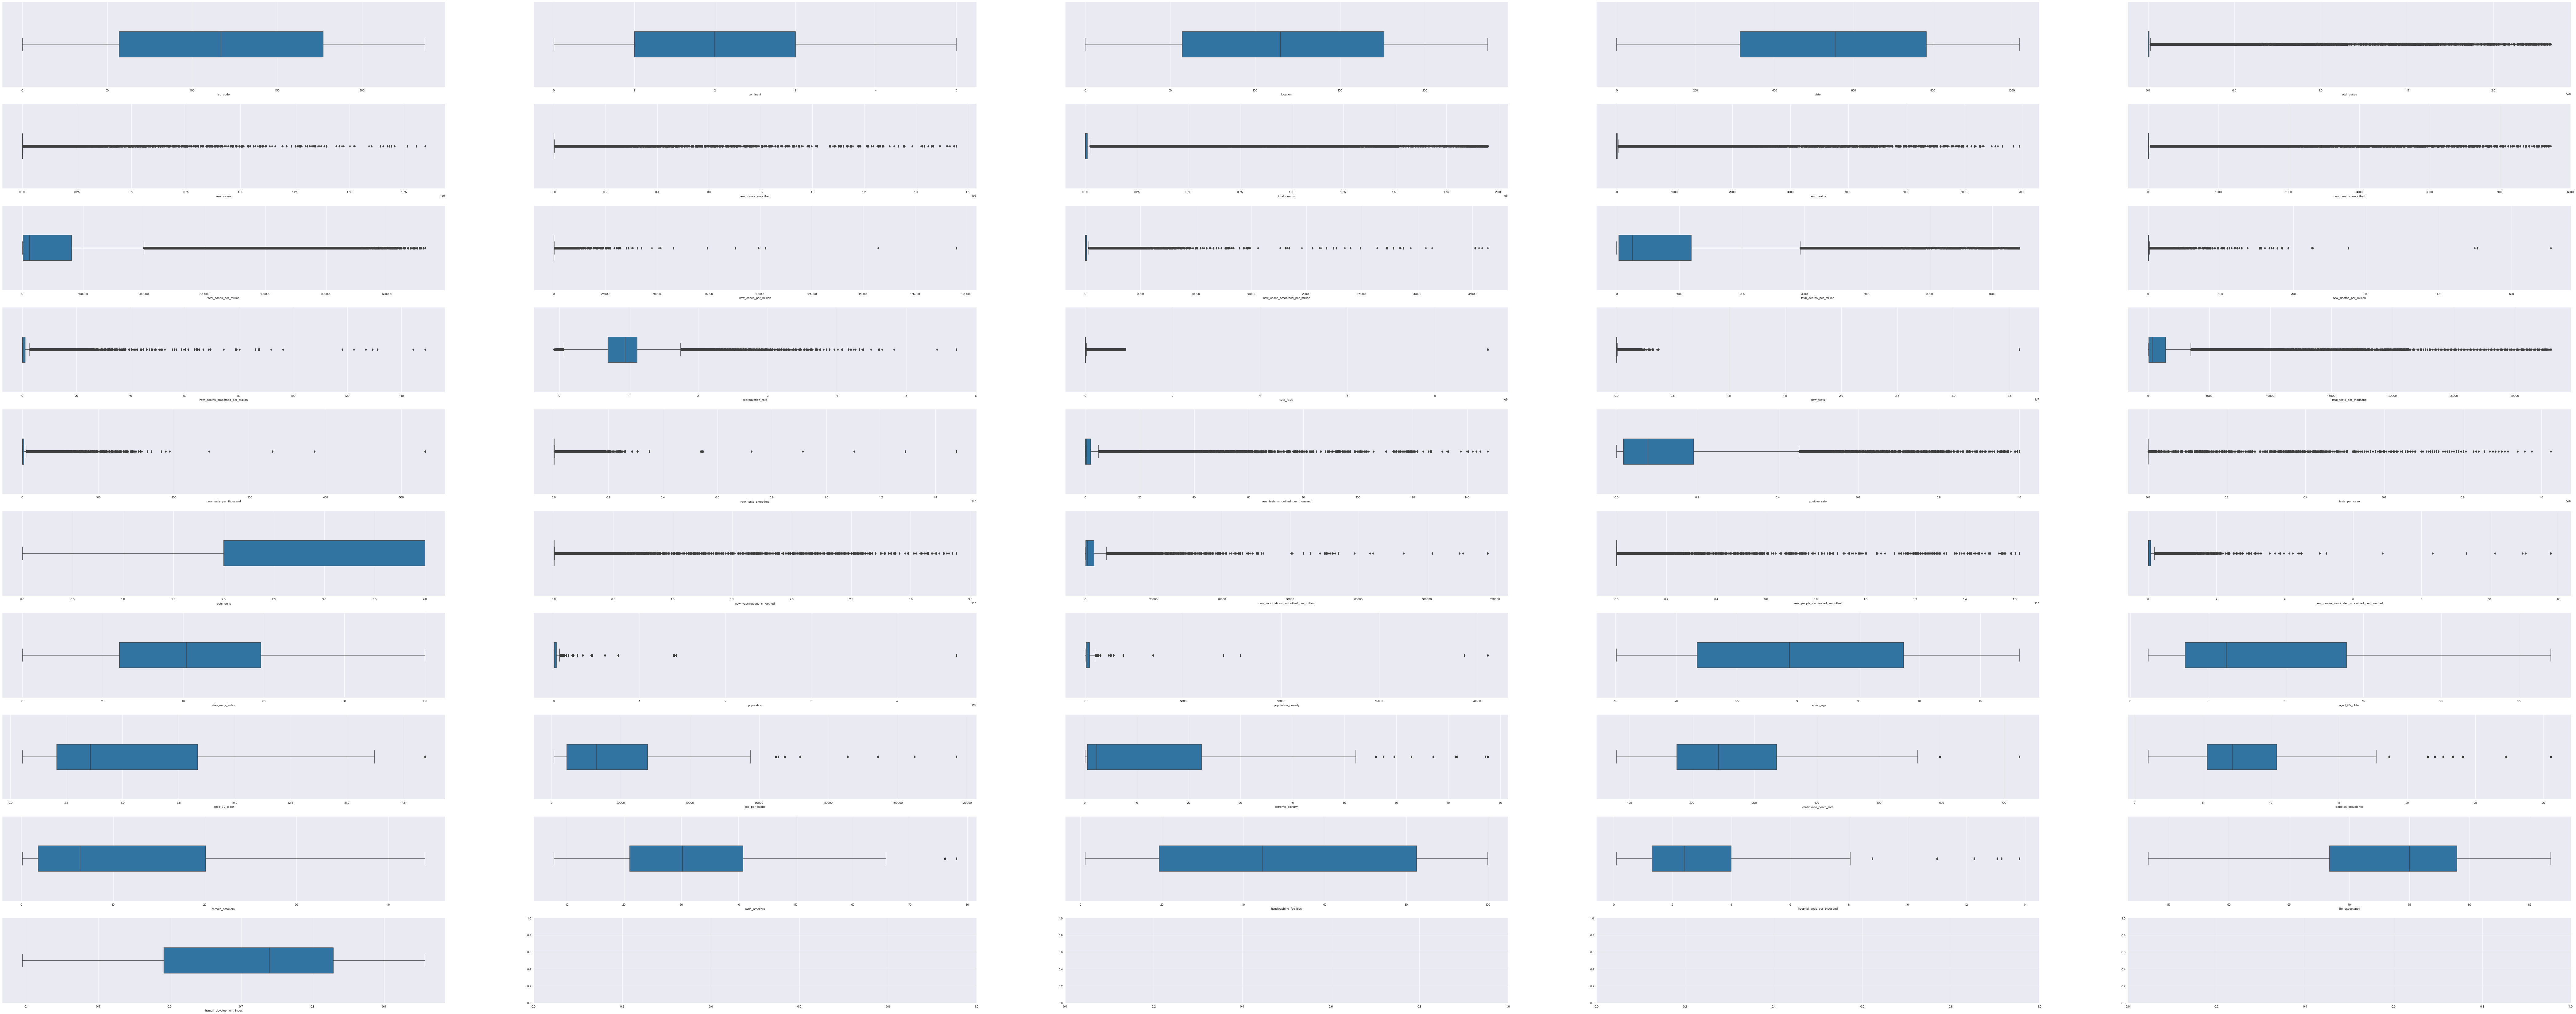

In [ ]:
import warnings
warnings.filterwarnings("ignore")
fig, axes = plt.subplots(10, 5, figsize=(150,60))
i = 0
g = 0
for col in df1.columns:
  sns.boxplot(df1[col], ax=axes[i, g], width=0.3)
  if g == 4 :
    g= 0
    i+=1
  else:
    g+=1

Первая:


```
# 'iso_code', 'continent', 'location', 'date', 'total_cases'
```


Вторая:

```
# 'new_cases', 'new_cases_smoothed', 'total_deaths', 'new_deaths','new_deaths_smoothed'
```



Третья:

```
# 'total_cases_per_million', 'new_cases_per_million','new_cases_smoothed_per_million', 'total_deaths_per_million', 'new_deaths_per_million'
```



Четвертая :


```
# 'new_deaths_smoothed_per_million', 'reproduction_rate', 'total_tests','new_tests', 'total_tests_per_thousand'
```



Пятая :

```
# 'new_tests_per_thousand', 'new_tests_smoothed', 'new_tests_smoothed_per_thousand', 'positive_rate', 'tests_per_case'
```



Шестая :

```
# tests_units, 'new_vaccinations_smoothed', 'new_vaccinations_smoothed_per_million', 'new_people_vaccinated_smoothed',
'new_people_vaccinated_smoothed_per_hundred'
```


Седьмая:

```
# 'stringency_index', 'population', 'population_density', 'median_age', 'aged_65_older'
```



Восьмая:

```
# 'aged_70_older', 'gdp_per_capita', 'extreme_poverty','cardiovasc_death_rate', 'diabetes_prevalence'
```

Девятая:

```
# 'female_smokers', 'male_smokers', 'handwashing_facilities', 'hospital_beds_per_thousand','life_expectancy'
```



'human_development_index'

Посмотрев на график мы видим где присутствуют выбросы, а где нет

выбросы для iso_code, continent, location, date, tests_units, stringency_index, median_age, aged_65_older, female_smokers, handwashing_facilities, life_expectancy, human_development_index отсутствуют

 Выбросы присутствуют в total_cases, new_cases, new_cases_smoothed, total_deaths, new_deaths, new_deaths_smoothed, total_cases_per_million, new_cases_per_million, new_cases_smoothed_per_million, total_deaths_per_million, new_deaths_per_million, new_deaths_smoothed_per_million, reproduction_rate, total_tests, new_tests, total_tests_per_thousand, new_tests_per_thousand, new_tests_smoothed, new_tests_smoothed_per_thousand, positive_rate, tests_per_case, new_vaccinations_smoothed, new_vaccinations_smoothed_per_million, new_people_vaccinated_smoothed, new_people_vaccinated_smoothed_per_hundred, population, population_density, aged_70_older, gdp_per_capita, extreme_poverty, cardiovasc_death_rate, diabetes_prevalence, male_smokers, hospital_beds_per_thousand

Итак вычислив в каких колонках присутствуют выбросы обрабатываем наши данные и выбрасываем все строки в которых есть выбросы


### Обработка выбросов

In [ ]:
len(df1)

218303

Делаем обработку цикл который пройдет по столбиками и удалит все строки с выбросами для каждого столбика

In [ ]:
columns = ['total_cases', 'new_cases', 'new_cases_smoothed', 'total_deaths', 'new_deaths', 'new_deaths_smoothed', 'total_cases_per_million', 'new_cases_per_million', 'new_cases_smoothed_per_million',
           'total_deaths_per_million', 'new_deaths_per_million', 'new_deaths_smoothed_per_million', 'reproduction_rate', 'total_tests', 'new_tests', 'total_tests_per_thousand', 'new_tests_per_thousand',
           'new_tests_smoothed', 'new_tests_smoothed_per_thousand', 'positive_rate', 'tests_per_case', 'new_vaccinations_smoothed', 'new_vaccinations_smoothed_per_million', 'new_people_vaccinated_smoothed',
           'new_people_vaccinated_smoothed_per_hundred', 'population', 'population_density', 'aged_70_older', 'gdp_per_capita', 'extreme_poverty', 'cardiovasc_death_rate', 'diabetes_prevalence', 'male_smokers',
           'hospital_beds_per_thousand']
for col in columns:
    Q1 =  df1[col].quantile(0.25)
    Q3 = df1[col].quantile(0.75)
    IQR = Q3 - Q1
    df1 = df1.loc[~((df1[col] < Q1-1.5*IQR ) | (df1[col] > Q3+1.5*IQR)),:]

In [ ]:
len(df1)

2900

По итогу в наших данных очень много выбросов

# Описание структуры данных

iso_code - ISO 3166-1 alpha-3 - трехбуквенные коды стран, Обратите внимание, что регионы, определенные OWID (например, континенты, такие как "Европа"), содержат префикс "OWID_".

continent - Континент географического положения.

location - Географическое положение.Местоположение "Международное" учитывает особые регионы (круизы "Diamond Princess" и "MS Zaandam").

date - Дата наблюдения/Дата в формате yyyy-mm-dd (То есть год-месяц-день)

total_cases - Общее количество подтвержденных случаев COVID-19, подсчеты могут включать вероятные случаи, о которых сообщалось.

new_cases - Новые подтвержденные случаи заболевания COVID-19, Подсчеты могут включать вероятные случаи, о которых сообщалось, в редких случаях, когда наш источник сообщает об отрицательном ежедневном изменении из-за коррекции данных, мы устанавливаем для этого показателя значение NA.

new_cases_smoothed - Новые подтвержденные случаи COVID-19 (7-дневный период сглажен), подсчеты могут включать вероятные случаи, о которых сообщалось.

total_deaths - Общее количество смертей, связанных с COVID-19, подсчеты могут включать вероятные случаи смерти, о которых сообщалось.

new_deaths - Новые случаи смерти, связанные с COVID-19, Подсчеты могут включать вероятные случаи смерти, о которых сообщалось, в редких случаях, когда наш источник сообщает об отрицательном ежедневном изменении из-за корректировки данных, мы устанавливаем для этого показателя значение NA.

new_deaths_smoothed - Новые случаи смерти, связанные с COVID-19 (сглажены за 7 дней), подсчеты могут включать вероятные случаи смерти, о которых сообщалось.

total_cases_per_million - Общее количество подтвержденных случаев COVID-19 на 1 000 000 человек, подсчеты могут включать вероятные случаи, о которых сообщалось.

new_cases_per_million - Новые подтвержденные случаи COVID-19 на 1 000 000 человек, подсчеты могут включать вероятные случаи, о которых сообщалось.

new_cases_smoothed_per_million - Новые подтвержденные случаи COVID-19 (сглаженные за 7 дней) на 1 000 000 человек, подсчеты могут включать вероятные случаи, о которых сообщалось.

total_deaths_per_million - Общее число смертей, связанных с COVID-19 на 1 000 000 человек, подсчеты могут включать вероятные случаи смерти, о которых сообщалось.

new_deaths_per_million - Новые случаи смерти, связанные с COVID-19, на 1 000 000 человек, подсчеты могут включать вероятные случаи смерти, о которых сообщалось.

new_deaths_smoothed_per_million - Новые случаи смерти, связанные с COVID-19 (сглаженные за 7 дней) на 1 000 000 человек, подсчеты могут включать вероятные случаи смерти, о которых сообщалось.

reproduction_rate - Оценка эффективной скорости размножения (R) COVID-19 в режиме реального времени.

См. https://github.com/crondonm/TrackingR/tree/main/Estimates-Database

icu_patients - Количество пациентов с COVID-19 в отделениях интенсивной терапии (ОИТ) за определенный день

icu_patients_per_million - Количество пациентов с COVID-19 в отделениях интенсивной терапии (ОИТ) в данный день на 1 000 000 человек

hosp_patients - Количество пациентов с COVID-19 в больнице в данный день

hosp_patients_per_million - Количество пациентов с COVID-19 в больнице в данный день на 1 000 000 человек

weekly_icu_admissions - Количество пациентов с COVID-19, вновь поступивших в отделения интенсивной терапии (ОИТ) за данную неделю (отчетная дата и предшествующие 6 дней)

weekly_icu_admissions_per_million - Число пациентов с COVID-19, вновь поступивших в отделения интенсивной терапии (ОИТ) за данную неделю на 1 000 000 человек (отчетная дата и предшествующие 6 дней)

weekly_hosp_admissions - Количество пациентов с COVID-19, вновь поступивших в больницы за данную неделю (отчетная дата и предшествующие 6 дней)

weekly_hosp_admissions_per_million - Число пациентов с COVID-19, вновь поступивших в больницы за данную неделю на 1 000 000 человек (отчетная дата и предшествующие 6 дней)

total_tests - Общее количество тестов на COVID-19 new_tests - Новые тесты на COVID-19 (рассчитываются только для последовательных дней)

total_tests_per_thousand - Общее количество тестов на COVID-19 на 1000 человек new_tests_smoothed - Новые тесты на COVID-19 (сглажены за 7 дней).

Для стран, которые не сообщают данные тестирования на ежедневной основе, мы предполагаем, что результаты тестирования ежедневно менялись одинаково в течение любых периодов, в которые данные не сообщались. В результате получается полный ряд ежедневных показателей, которые затем усредняются в течение 7-дневного периода

new_tests_smoothed_per_thousand - Новые тесты на COVID-19 (сглаженные за 7 дней) на 1000 человек

positive_rate - Доля положительных тестов на COVID-19, приведенная в виде скользящего среднего значения за 7 дней (это обратная величина tests_per_case)

tests_per_case - Тесты, проводимые для каждого нового подтвержденного случая COVID-19, приведены в виде скользящего среднего значения за 7 дней (это обратная величина positive_rate)

tests_units - Единицы, используемые местоположением для предоставления данных тестирования. Файл страны не может содержать смешанные единицы измерения. Все показатели, касающиеся данных тестирования, используют указанную тестовую единицу.

Допустимыми единицами измерения являются "проверенные люди" (количество проверенных людей), "проведенные тесты" (количество проведенных тестов. Одного человека можно тестировать более одного раза в день) и "проверенные образцы" (количество проверенных образцов.В некоторых случаях для выполнения одного теста может потребоваться более одного образца.)

total_vaccinations - Общее количество введенных доз вакцинации против COVID-19.

people_vaccinated - Общее число людей, получивших хотя бы одну дозу вакцины.

people_fully_vaccinated - Общее число людей, получивших все дозы, предписанные первоначальным протоколом вакцинации.

total_boosters - Общее количество введенных бустерных доз вакцинации против COVID-19(дозы, введенные сверх количества, предписанного протоколом вакцинации).

new_vaccinations - Вводятся новые дозы вакцинации против COVID-19 (рассчитанные только для последовательных дней).



## Статистику распределения данных (плотность, наличие пустых значений, матрица корреляции)

### Выведем матрицу корреляции наших данных

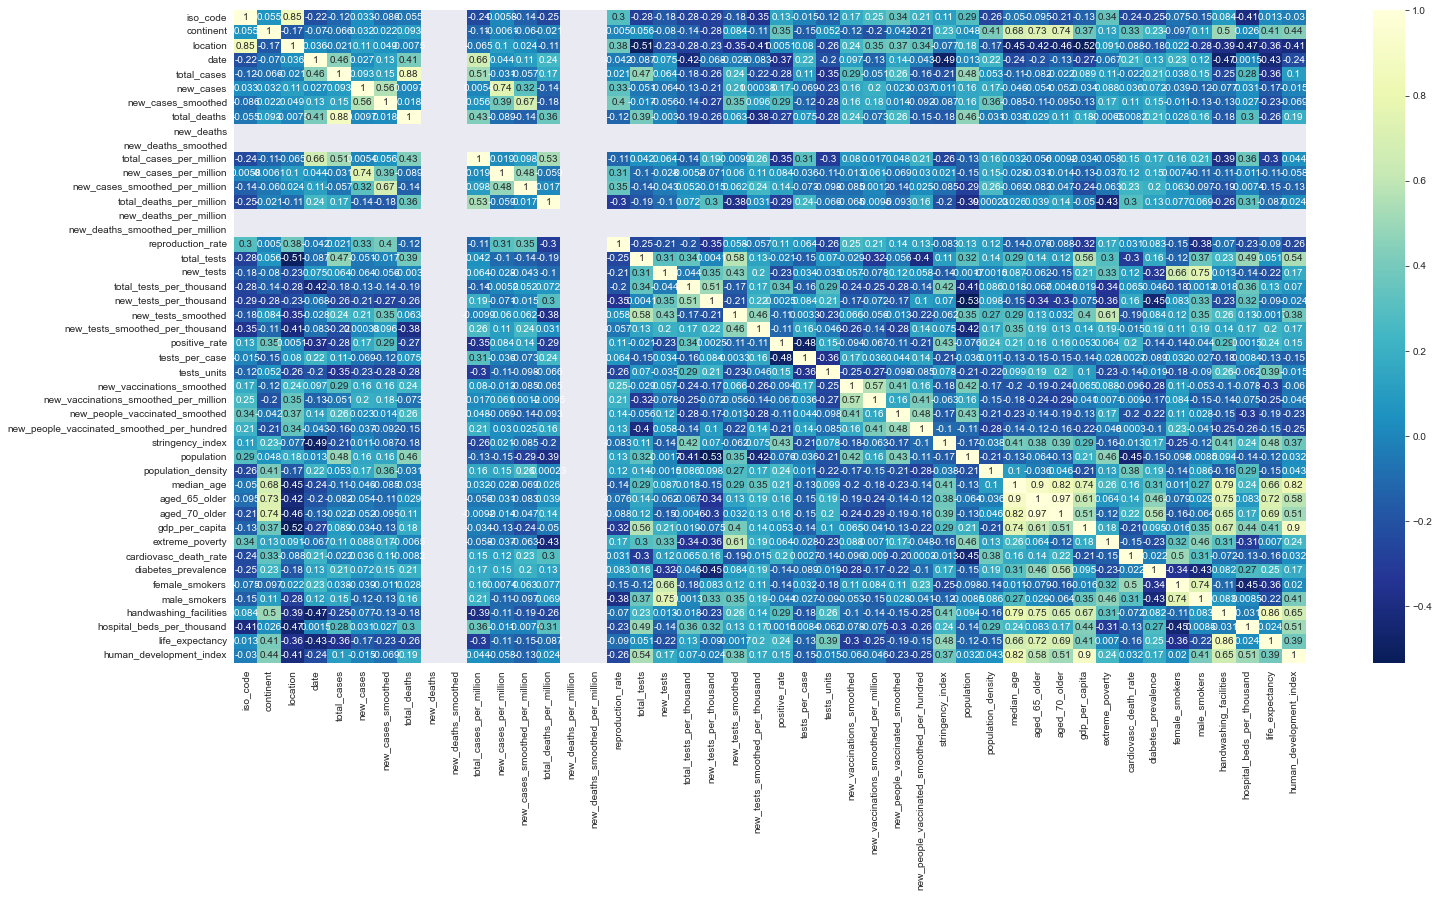

In [ ]:
plt.figure(figsize=(24,12))
sns.heatmap(df1.corr(),annot=True,cmap="YlGnBu_r")
plt.show()

Мы видим что у нас есть данные которые вообще не коррелируют ни с кем, выкидываем их, чтоб они не мешали нашему обучению

In [ ]:
df1 = df1.drop(columns=['new_deaths', 'new_deaths_smoothed', 'new_deaths_per_million', 'new_deaths_smoothed_per_million'])

Строим повторно матрицу корреляции чтобы убедиться, что все хорошо

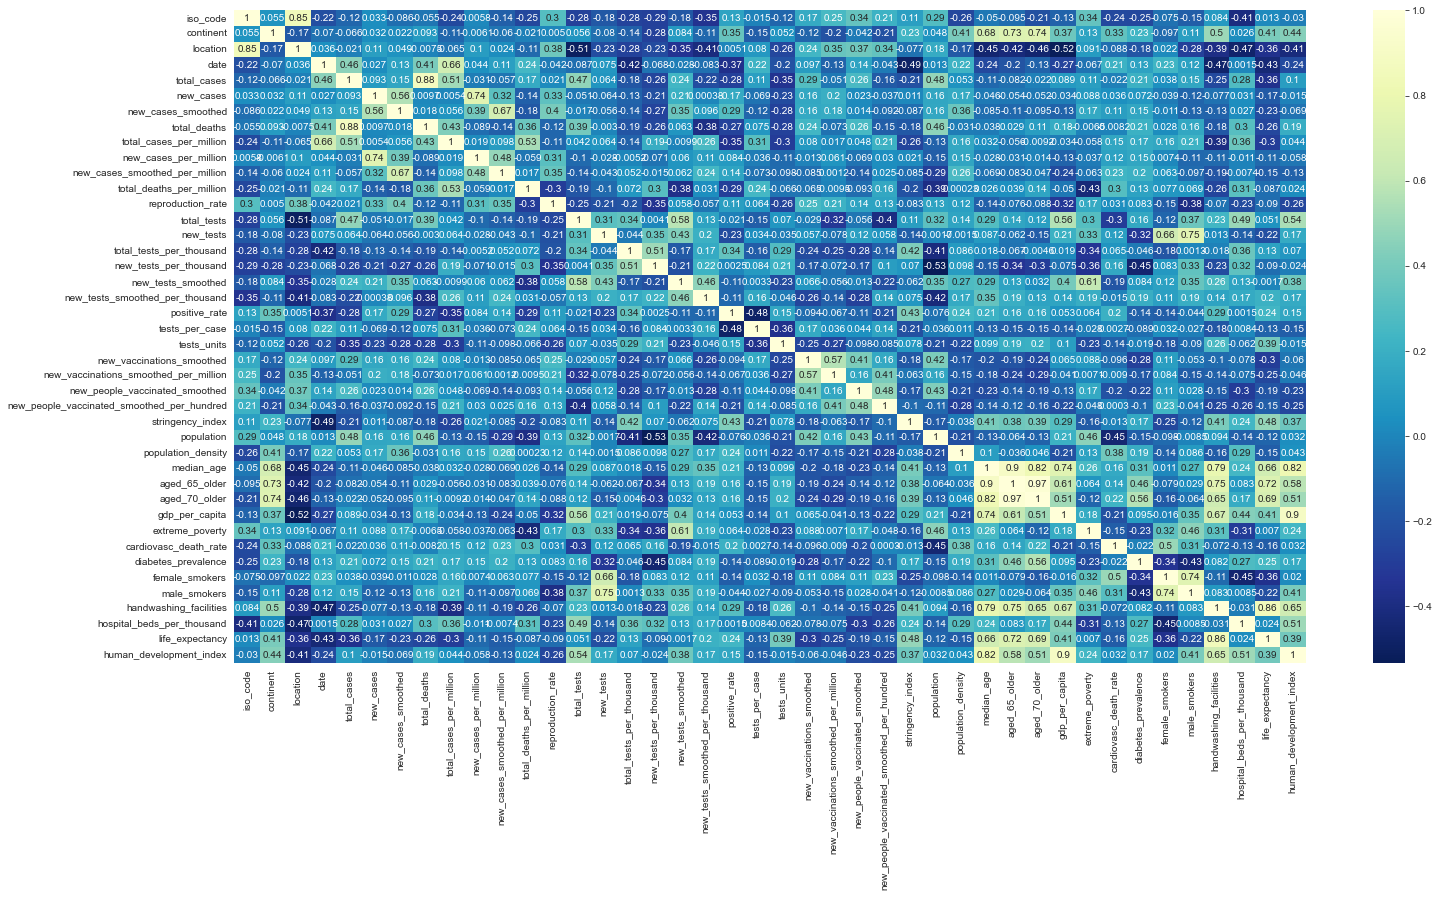

In [ ]:
plt.figure(figsize=(24,12))
sns.heatmap(df1.corr(),annot=True,cmap="YlGnBu_r")
plt.show()

Пустых значений в наших данных нету, мы их все обработали в  ***[Предообработке данных](https://colab.research.google.com/drive/1VVKap_lFnOkiv5o_hGQ4C-jDVrTulhEO?authuser=1#scrollTo=wgd66dtXaTLI)***.

## Статистику распределения данных по плотности

In [ ]:
df1_column = df1.columns
print(df1_column)

Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'reproduction_rate', 'total_tests',
       'new_tests', 'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'tests_units',
       'new_vaccinations_smoothed', 'new_vaccinations_smoothed_per_million',
       'new_people_vaccinated_smoothed',
       'new_people_vaccinated_smoothed_per_hundred', 'stringency_index',
       'population', 'population_density', 'median_age', 'aged_65_older',
       'aged_70_older', 'gdp_per_capita', 'extreme_poverty',
       'cardiovasc_death_rate', 'diabetes_prevalence', 'female_smokers',
       'male_smokers', 'handwashing_facilities', 'hospital_beds_per_thousand',
       'life_expectancy', 'human_devel

Отобразим основную статистику о данных

In [ ]:
df1.describe()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,total_cases_per_million,new_cases_per_million,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
count,2900.000000,2900.000000,2900.00000,2900.000000,2900.000000,2900.000000,2900.000000,2900.000000,2900.000000,2900.000000,...,2900.000000,2900.000000,2900.000000,2900.000000,2900.000000,2900.000000,2900.000000,2900.000000,2900.000000,2900.000000
mean,90.921724,0.290345,85.50069,594.979310,23154.239310,4.294138,5.632422,356.964138,2084.485898,0.447274,...,1884.783668,36.979414,302.834138,4.380714,4.863759,24.885793,21.832515,0.727569,63.785345,0.491115
std,47.507837,0.715841,49.73888,330.774959,41297.508045,10.723340,9.343917,569.966796,2466.623758,0.981299,...,982.758752,26.948429,49.765359,1.835663,10.220885,12.114218,20.509933,0.306587,3.609371,0.060584
min,13.000000,0.000000,34.00000,26.000000,1.000000,0.000000,0.000000,1.000000,0.040000,0.000000,...,702.225000,2.200000,227.349000,1.910000,0.100000,7.700000,2.735000,0.200000,57.780000,0.394000
25%,59.000000,0.000000,49.00000,263.750000,438.250000,0.000000,0.286000,38.000000,46.648000,0.000000,...,1429.813000,10.100000,270.892000,2.420000,0.200000,14.200000,7.876000,0.700000,61.580000,0.459000
50%,77.000000,0.000000,77.00000,769.000000,8726.000000,0.000000,1.857000,170.500000,1823.633500,0.000000,...,1510.459000,44.500000,311.110000,4.000000,0.900000,23.900000,10.475000,0.700000,62.420000,0.480000
75%,107.000000,0.000000,91.00000,894.000000,30818.000000,3.000000,6.429000,312.000000,3348.999000,0.349000,...,1998.926000,67.100000,331.430000,6.050000,2.000000,33.700000,24.640000,0.800000,66.320000,0.524000
max,207.000000,3.000000,212.00000,1019.000000,225835.000000,147.000000,63.429000,3056.000000,17620.759000,5.405000,...,4541.795000,77.600000,430.548000,7.210000,35.300000,52.000000,84.169000,1.400000,75.270000,0.634000


### Распределение переменных

Distplot - изображает изменение в распределении данных. Seaborn Distplot представляет собой общее распределение непрерывных переменных данных.

In [ ]:
len(df1.columns)

42

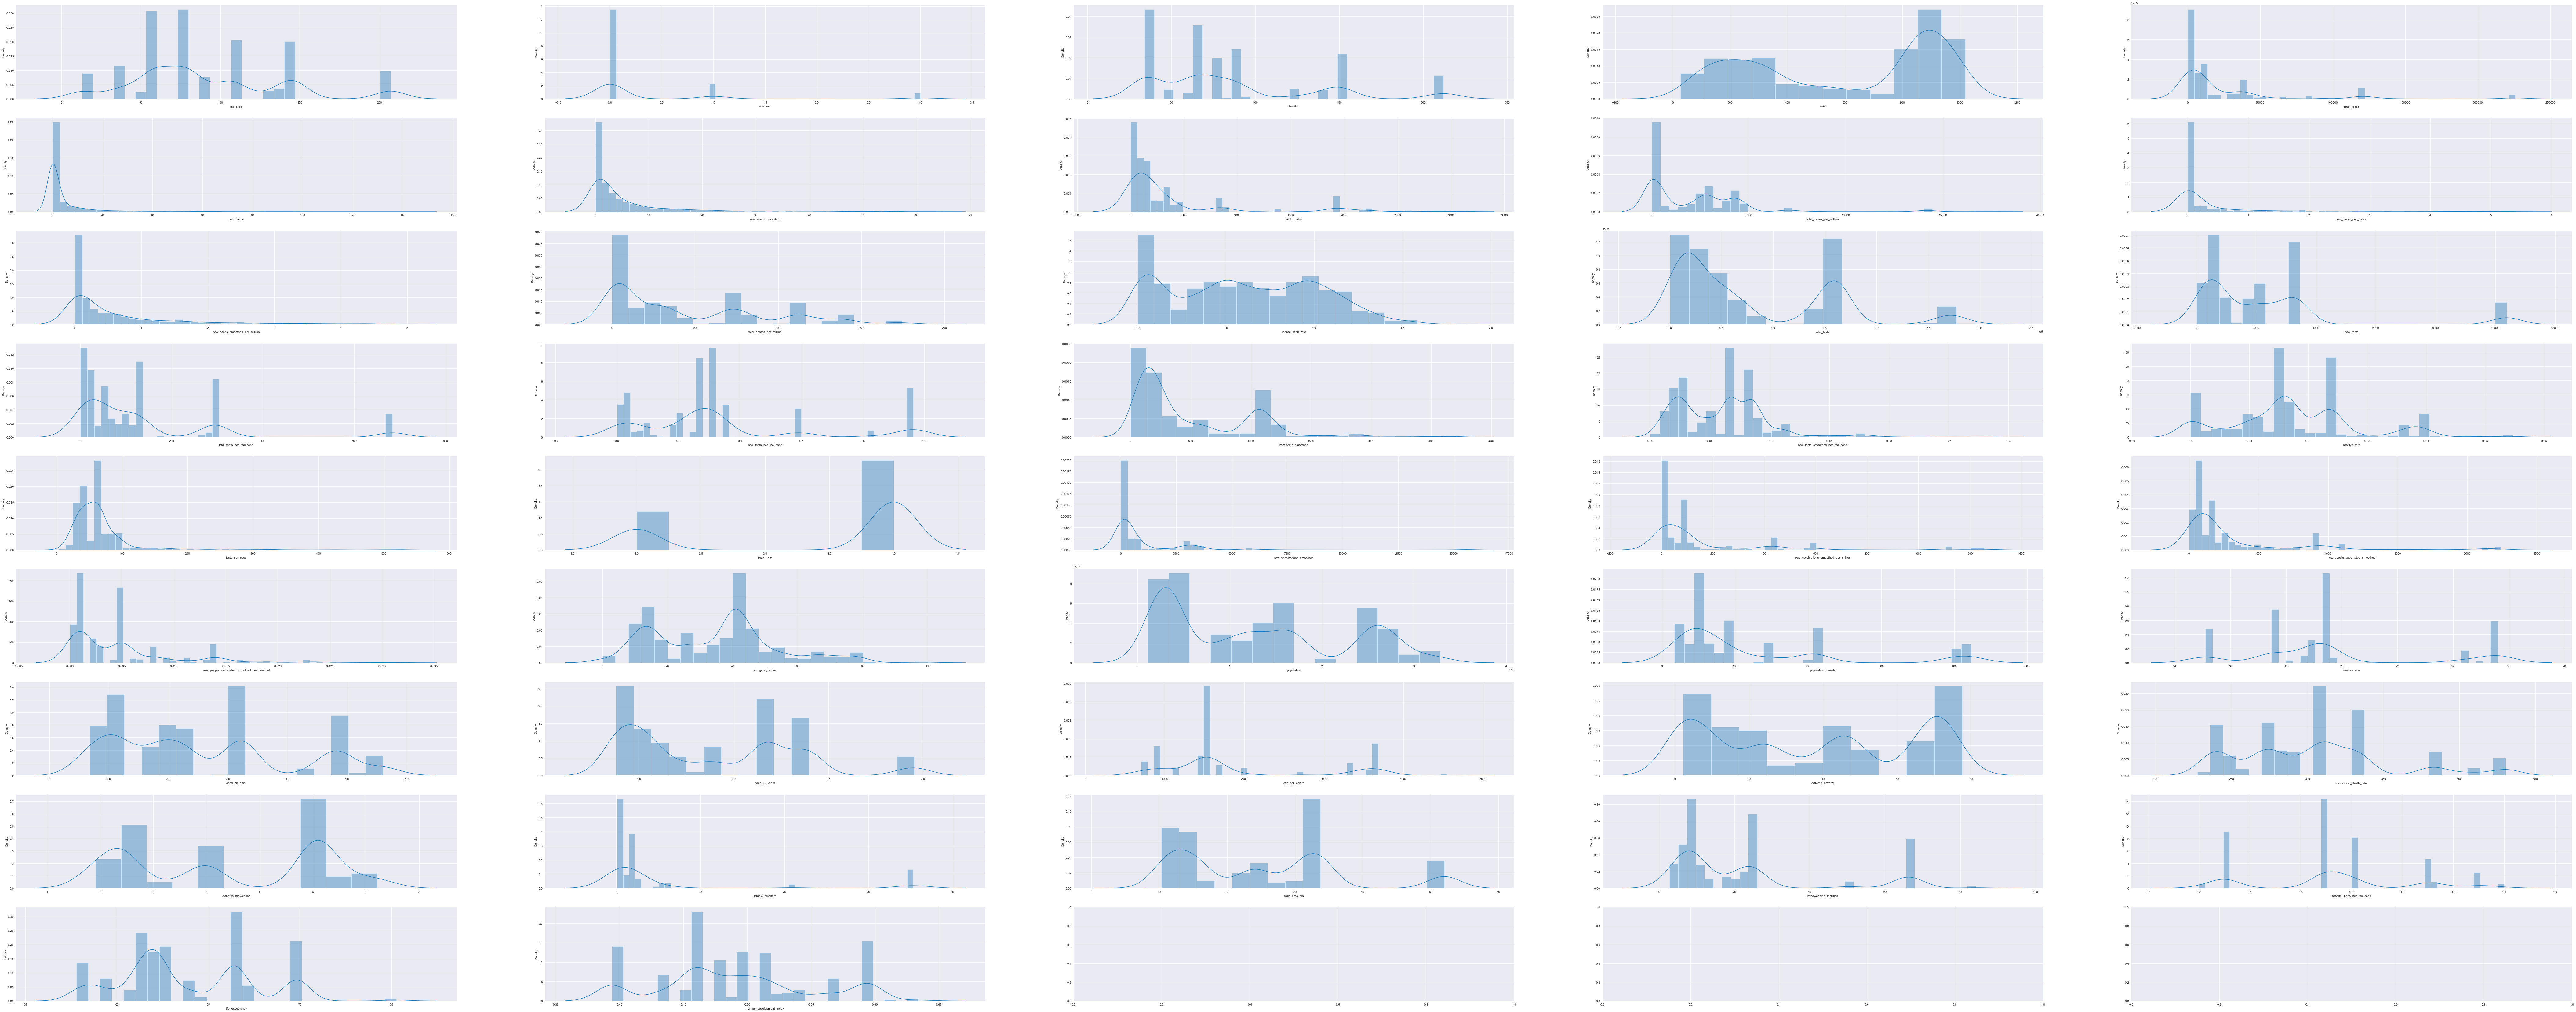

In [ ]:
import warnings
warnings.filterwarnings("ignore")
fig, axes = plt.subplots(9, 5, figsize=(150,60))
i = 0
g = 0
for col in df1.columns:
  sns.distplot(df1[col], ax=axes[i, g])
  if g == 4 :
    g = 0
    i+=1
  else:
    g+=1

# Формирование дополнительных атрибутов

## Формирование дополнительного атрибута (Rt (коэффициента распространения инфекции) )

коэффициента распространения инфекции расчитываеться по формуле Rt = (X8+X7+X6+X5) / (X1+X2+X3+X4), где:

Rt - коэффициент распространения коронавируса;

X1…X8 - количество зарегистрированных больных коронавирусом в регионе за соответствующие сутки.

(это формула была использована Роспотребнадзора)

Создадим алгоритм для выщитывания X!...X8 и Rt.

In [ ]:
from numpy.ma.core import append
df_total_cases = df1['total_cases'].tolist() # список, сколько в данный день заражённых
Rt = [0,0,0,0,0,0,0,0] # коэффициент распространения коронавируса

for counter in range(len(df_total_cases[8:])): # цикл, для нахождения значений Rt
  X1 = df_total_cases[counter]
  X2 = df_total_cases[counter+1]
  X3 = df_total_cases[counter+2]
  X4 = df_total_cases[counter+3]
  X5 = df_total_cases[counter+4]
  X6 = df_total_cases[counter+5]
  X7 = df_total_cases[counter+6]
  X8 = df_total_cases[counter+7]
  Rt.append((X8+X7+X6+X5) / (X1+X2+X3+X4)) # нахождение 1 из значений будущего столбца Rt
df1['Rt'] = Rt # добавления списка Rt в столбец 'Rt' в конце DataFrame(df)

Проверка на наличие Rt в df.

Нельзя забывать что первые 8 значений в df имеют 0, потому до них нету 8 дней и для них нельзя составить Rt (это один из минусов формулы Rt).

In [ ]:
df1.head(10)

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,total_cases_per_million,new_cases_per_million,...,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,Rt
33254,13.0,0.0,34.0,762.0,37432.0,0.0,42.000,38.0,2982.341,0.000,...,71.7,293.068,6.05,1.6,23.9,6.144,0.8,61.58,0.433,0.000000
33255,13.0,0.0,34.0,763.0,37469.0,37.0,42.714,38.0,2985.289,2.948,...,71.7,293.068,6.05,1.6,23.9,6.144,0.8,61.58,0.433,0.000000
33259,13.0,0.0,34.0,767.0,37562.0,0.0,37.571,38.0,2992.699,0.000,...,71.7,293.068,6.05,1.6,23.9,6.144,0.8,61.58,0.433,0.000000
33261,13.0,0.0,34.0,769.0,37756.0,14.0,46.286,38.0,3008.155,1.115,...,71.7,293.068,6.05,1.6,23.9,6.144,0.8,61.58,0.433,0.000000
33262,13.0,0.0,34.0,770.0,37756.0,0.0,41.000,38.0,3008.155,0.000,...,71.7,293.068,6.05,1.6,23.9,6.144,0.8,61.58,0.433,0.000000
33263,13.0,0.0,34.0,771.0,37816.0,60.0,36.286,38.0,3012.936,4.780,...,71.7,293.068,6.05,1.6,23.9,6.144,0.8,61.58,0.433,0.000000
33264,13.0,0.0,34.0,772.0,37856.0,40.0,42.000,38.0,3016.123,3.187,...,71.7,293.068,6.05,1.6,23.9,6.144,0.8,61.58,0.433,0.000000
33265,13.0,0.0,34.0,773.0,37856.0,0.0,42.000,38.0,3016.123,0.000,...,71.7,293.068,6.05,1.6,23.9,6.144,0.8,61.58,0.433,0.000000
33266,13.0,0.0,34.0,774.0,37856.0,0.0,42.000,38.0,3016.123,0.000,...,71.7,293.068,6.05,1.6,23.9,6.144,0.8,61.58,0.433,1.007090
33267,13.0,0.0,34.0,775.0,37902.0,46.0,22.857,38.0,3019.788,3.665,...,71.7,293.068,6.05,1.6,23.9,6.144,0.8,61.58,0.433,1.005586


# Кластеризация набора данных

### Нормализуем наши данные

Перед самой кластеризацией, нужно нормализовать наши данные

In [ ]:
from sklearn.preprocessing import MinMaxScaler

mmsc = MinMaxScaler()
df_norm = mmsc.fit_transform(df1)

### **Инерция**

Инерция показывает, насколько когерентны различные кластеры.

Вычисляется по следующей формуле:

$inertia = \sum_{i=1}^N (x_i - C_k)$

* N — количество выборок в наборе данных
* C — центр кластера.

Таким образом, Inertia просто вычисляет квадрат расстояния от каждой выборки в кластере до его центра кластера и суммирует их. Этот процесс выполняется для каждого кластера и всех выборок в этом наборе данных. Чем меньше значение Inertia, тем более когерентны различные кластеры. Когда добавляется столько кластеров, сколько имеется выборок в наборе данных, значение инерции будет равно нулю.

### Как оценить качество получившегося кластерного разбиения?
### Коэффициент Силуэтта
Силуэтом выборки называется средняя величина силуэта объектов данной выборки. Таким образом, силуэт показывает, насколько среднее расстояние до объектов своего кластера отличается от среднего расстояния до объектов других кластеров. Эта величина меняется в интервале от  −1  до  1 :

-1 значит что кластера плохие, размытые
0 значит что кластера накладываются друг на друга
1 значит что кластера плотные и хорошо отделены друг от друга
Таким образом, чем ближе значение к-та Силуэтта в единице, тем лучше. Все, что больше  0.5  хорошие значения, всё что меньше - надо улучшать.

Формулу реализовывать не надо, она уже есть в sklearn. Для примера загрузим наш датасет с кластеризацией:

### KMeans Cluster

In [ ]:
%%time
from sklearn.cluster import KMeans
# Определяем количество кластеров, на сколько будем разбивать
n_clusters = 3

clusterer = KMeans(n_clusters=n_clusters)
# Учим и предсказываем наши кластеры
cluster_labels = clusterer.fit_predict(df_norm)

# inertia
inertia = clusterer.inertia_

CPU times: total: 93.8 ms
Wall time: 143 ms


In [ ]:
print("For n_clusters =", n_clusters,
      ", the inertia is :", inertia)

For n_clusters = 3 , the inertia is : 5245.47987098221


In [ ]:
# Выводим предсказания
predictions1 = pd.DataFrame(cluster_labels, columns=['danger level for tourists'])
predictions1 = predictions1.reset_index()
predictions1

,index,danger level for tourists
0,0,2
1,1,2
2,2,2
3,3,2
4,4,2
...,...,...
2895,2895,0
2896,2896,0
2897,2897,0
2898,2898,0


In [ ]:
a = list(predictions1['danger level for tourists'].unique())
a

[2, 1, 0]

Выбираем алгоритм кластеризации по Коэффициент Силуэтта, чем ближе к 1, тем лучше

In [ ]:
%%time
from sklearn.metrics import silhouette_score

silhouette_avg = silhouette_score(df_norm, cluster_labels)
print("For n_clusters =", n_clusters,
      ", the silhouette is :", silhouette_avg)

For n_clusters = 3 , the silhouette is : 0.2547684563367604
CPU times: total: 766 ms
Wall time: 163 ms


### GaussianMixture

In [ ]:
%%time
from sklearn.mixture import GaussianMixture
n_clusters = 3
gmm_model = GaussianMixture(n_components=n_clusters)
cluster_labels = gmm_model.fit_predict(df_norm)
# inertia
inertia = clusterer.inertia_

CPU times: total: 78.1 ms
Wall time: 35.6 ms


In [ ]:
print("For n_clusters =", n_clusters,
      ", the inertia is :", inertia)
# Выводим предсказания
predictions2 = pd.DataFrame(cluster_labels, columns=['danger level for tourists'])
predictions2 = predictions2.reset_index()
predictions2

For n_clusters = 3 , the inertia is : 5245.47987098221


,index,danger level for tourists
0,0,2
1,1,2
2,2,2
3,3,2
4,4,2
...,...,...
2895,2895,1
2896,2896,1
2897,2897,1
2898,2898,1


In [ ]:
a = list(predictions2['danger level for tourists'].unique())
a

[2, 0, 1]

Выбираем алгоритм кластеризации по Коэффициент Силуэтта, чем ближе к 1, тем лучше

In [ ]:
%%time
from sklearn.metrics import silhouette_score

silhouette_avg = silhouette_score(df_norm, cluster_labels)
print("For n_clusters =", n_clusters,
      ", the silhouette is :", silhouette_avg)

For n_clusters = 3 , the silhouette is : 0.23967860063902457
CPU times: total: 828 ms
Wall time: 151 ms


### SpectralClustering

In [ ]:
%%time
from sklearn.cluster import SpectralClustering
spectral_cluster_model= SpectralClustering(
    n_clusters=3,
    random_state=25,
    n_neighbors=8,
    affinity='nearest_neighbors'
)
cluster_labels = spectral_cluster_model.fit_predict(df_norm)
# inertia
inertia = clusterer.inertia_

CPU times: total: 1.3 s
Wall time: 614 ms


In [ ]:
print("For n_clusters =", n_clusters,
      ", the inertia is :", inertia)
# Выводим предсказания
predictions3 = pd.DataFrame(cluster_labels, columns=['danger level for tourists'])
predictions3 = predictions3.reset_index()
predictions3

For n_clusters = 3 , the inertia is : 5245.47987098221


,index,danger level for tourists
0,0,0
1,1,0
2,2,0
3,3,0
4,4,0
...,...,...
2895,2895,2
2896,2896,2
2897,2897,2
2898,2898,2


In [ ]:
a = list(predictions3['danger level for tourists'].unique())
a

[0, 2, 1]

In [ ]:
%%time
from sklearn.metrics import silhouette_score

silhouette_avg = silhouette_score(df_norm, cluster_labels)

CPU times: total: 1.38 s
Wall time: 145 ms


Выбираем алгоритм кластеризации по Коэффициент Силуэтта, чем ближе к 1, тем лучше

In [ ]:
print("For n_clusters =", n_clusters,
      ", the silhouette is :", silhouette_avg)

For n_clusters = 3 , the silhouette is : 0.038998287562157


# Формируем ответ, и выгружаем его

Требуется сделать 3 кластера, но лучше выделяется 6 - так заметка

По итогу самой лучшей кластеризацией оказался метод KMeans, но у него не очень большая разница с методом GaussianMixture

In [ ]:
prediction = predictions1
prediction

,index,danger level for tourists
0,0,2
1,1,2
2,2,2
3,3,2
4,4,2
...,...,...
2895,2895,0
2896,2896,0
2897,2897,0
2898,2898,0


In [ ]:
prediction.to_csv('prediction.csv', index=False)

In [ ]:
# Методы колаба
# from google.colab import files
# prediction.to_csv("prediction.csv", index=False)
# files.download("prediction.csv")

## Сохраняем и выгружаем наши обновленные данные

In [ ]:
# Методы колаба
# from google.colab import files
# df1.to_csv("df.csv", index=False)
# files.download("df.csv")